# Exploratory Data Analysis & Intro

## Goal

1. investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job posting.
3. for job-seekers: use these insights to help find the best job opportunities.

# Questions to Answer:

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand Paying)


# What are the most demanded skills for the top 3 most popular data roles?


## Methodology


1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Plot initial findings
4. Calculate skill percentage
5. Plot final findings



In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset
 
# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
# merge dataframes 

In [10]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country'] == 'United States')].copy()


In [11]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame() # top 10 locations, to_frame() converts the series to a dataframe
df_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


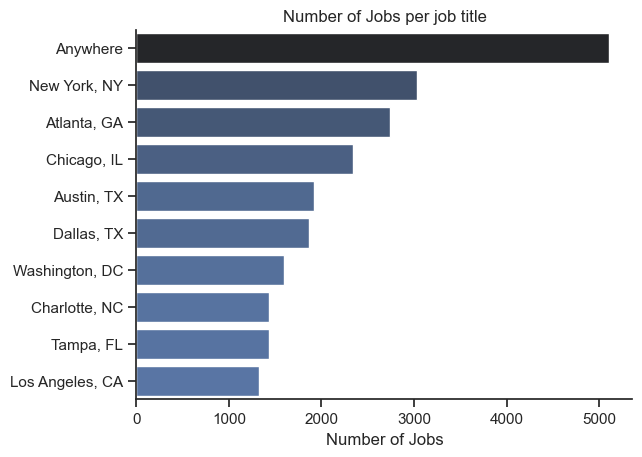

In [21]:
sns.set_theme(style = 'ticks' )
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine() # removes the top and right spines (borders)

plt.title('Number of Jobs per job title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

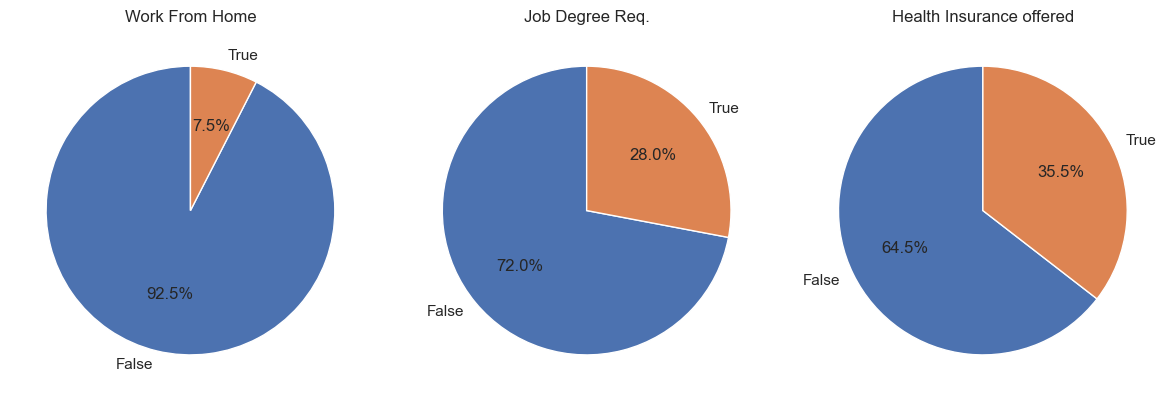

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))  # Added figsize for better display

dict_columns = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance offered'
}

for i, (column, title) in enumerate(dict_columns.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
    
    # Add borders to each subplot
    for spine in ax[i].spines.values():
        spine.set_linewidth(3)  # Set border width
        spine.set_color('blue')  # Set border color

# Optional: Adjust layout to prevent title overlap
plt.tight_layout()
plt.show()

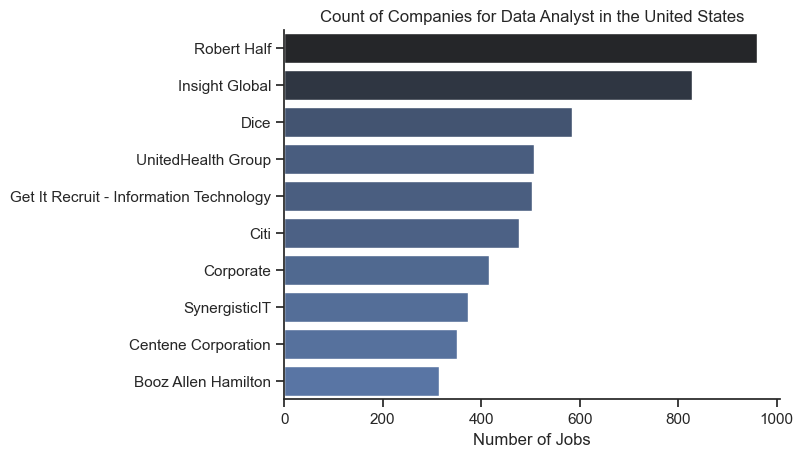

In [26]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame() # top 10 locations, to_frame() converts the series to a dataframe

sns.set_theme(style = 'ticks' )
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine() # removes the top and right spines (borders)

plt.title('Count of Companies for Data Analyst in the United States')
plt.xlabel('Number of Jobs')
plt.ylabel('')
 
plt.show() 

#NOTE: command + Shift + L  to run all cells in the notebook